## Project 1. 손수 설계하는 선형회귀, 당뇨병 수치 맞추기

### (1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df_X.shape)
df_X.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [3]:
df_y = diabetes.target
print(df_y.shape)

(442,)


In [4]:
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### (2) 모델에 입력할 데이터 x 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [6]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

In [7]:
print(X, y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]] [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [8]:
print(X.shape, y.shape)

(442, 10) (442,)


## (4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [10]:
W = np.random.rand(10)
b = np.random.rand()

print(W, b)

[0.2021939  0.23610221 0.95504645 0.83294779 0.08297456 0.44071764
 0.22304937 0.44272317 0.28013363 0.31771774] 0.8125269197579942


**모델 함구 구현**

In [11]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [12]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [13]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [14]:
def gradient(X, W, b, y):
    # N은 data의 개수
    N = len(X)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [15]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.37158509 -0.31186779 -4.28781416 -3.22622608 -1.54649522 -1.26858675
  2.88758613 -3.14585594 -4.13800564 -2.79497561]
db: -302.6419144862759


## (8) 하이퍼 파라미터인 학습률 설정하기 
- 학습률, learning rate 를 설정해주세요.
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.    

## (9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요


In [24]:
LEARNING_RATE = 0.1

In [25]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 3311.1759
Iteration 20 : Loss 3306.1979
Iteration 30 : Loss 3301.3009
Iteration 40 : Loss 3296.4830
Iteration 50 : Loss 3291.7424
Iteration 60 : Loss 3287.0772
Iteration 70 : Loss 3282.4857
Iteration 80 : Loss 3277.9663
Iteration 90 : Loss 3273.5173
Iteration 100 : Loss 3269.1370
Iteration 110 : Loss 3264.8240
Iteration 120 : Loss 3260.5768
Iteration 130 : Loss 3256.3939
Iteration 140 : Loss 3252.2739
Iteration 150 : Loss 3248.2154
Iteration 160 : Loss 3244.2171
Iteration 170 : Loss 3240.2777
Iteration 180 : Loss 3236.3960
Iteration 190 : Loss 3232.5707
Iteration 200 : Loss 3228.8006
Iteration 210 : Loss 3225.0846
Iteration 220 : Loss 3221.4216
Iteration 230 : Loss 3217.8105
Iteration 240 : Loss 3214.2503
Iteration 250 : Loss 3210.7398
Iteration 260 : Loss 3207.2782
Iteration 270 : Loss 3203.8644
Iteration 280 : Loss 3200.4974
Iteration 290 : Loss 3197.1765
Iteration 300 : Loss 3193.9006
Iteration 310 : Loss 3190.6689
Iteration 320 : Loss 3187.4806
Iteration 330 : L

Iteration 2620 : Loss 2926.9699
Iteration 2630 : Loss 2926.6798
Iteration 2640 : Loss 2926.3924
Iteration 2650 : Loss 2926.1076
Iteration 2660 : Loss 2925.8255
Iteration 2670 : Loss 2925.5460
Iteration 2680 : Loss 2925.2692
Iteration 2690 : Loss 2924.9949
Iteration 2700 : Loss 2924.7231
Iteration 2710 : Loss 2924.4539
Iteration 2720 : Loss 2924.1872
Iteration 2730 : Loss 2923.9229
Iteration 2740 : Loss 2923.6611
Iteration 2750 : Loss 2923.4018
Iteration 2760 : Loss 2923.1448
Iteration 2770 : Loss 2922.8902
Iteration 2780 : Loss 2922.6380
Iteration 2790 : Loss 2922.3881
Iteration 2800 : Loss 2922.1406
Iteration 2810 : Loss 2921.8953
Iteration 2820 : Loss 2921.6523
Iteration 2830 : Loss 2921.4115
Iteration 2840 : Loss 2921.1730
Iteration 2850 : Loss 2920.9366
Iteration 2860 : Loss 2920.7025
Iteration 2870 : Loss 2920.4705
Iteration 2880 : Loss 2920.2406
Iteration 2890 : Loss 2920.0129
Iteration 2900 : Loss 2919.7873
Iteration 2910 : Loss 2919.5637
Iteration 2920 : Loss 2919.3422
Iteratio

Iteration 7880 : Loss 2894.7134
Iteration 7890 : Loss 2894.7095
Iteration 7900 : Loss 2894.7057
Iteration 7910 : Loss 2894.7020
Iteration 7920 : Loss 2894.6982
Iteration 7930 : Loss 2894.6945
Iteration 7940 : Loss 2894.6908
Iteration 7950 : Loss 2894.6871
Iteration 7960 : Loss 2894.6835
Iteration 7970 : Loss 2894.6798
Iteration 7980 : Loss 2894.6762
Iteration 7990 : Loss 2894.6726
Iteration 8000 : Loss 2894.6691
Iteration 8010 : Loss 2894.6655
Iteration 8020 : Loss 2894.6620
Iteration 8030 : Loss 2894.6585
Iteration 8040 : Loss 2894.6551
Iteration 8050 : Loss 2894.6516
Iteration 8060 : Loss 2894.6482
Iteration 8070 : Loss 2894.6448
Iteration 8080 : Loss 2894.6414
Iteration 8090 : Loss 2894.6380
Iteration 8100 : Loss 2894.6347
Iteration 8110 : Loss 2894.6314
Iteration 8120 : Loss 2894.6281
Iteration 8130 : Loss 2894.6248
Iteration 8140 : Loss 2894.6215
Iteration 8150 : Loss 2894.6183
Iteration 8160 : Loss 2894.6151
Iteration 8170 : Loss 2894.6119
Iteration 8180 : Loss 2894.6087
Iteratio

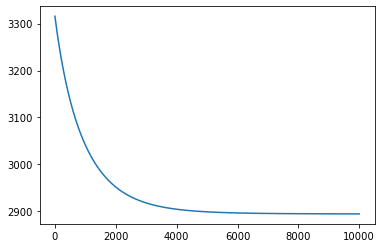

In [26]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

## (10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.

In [27]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2881.5383753343085

## (11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

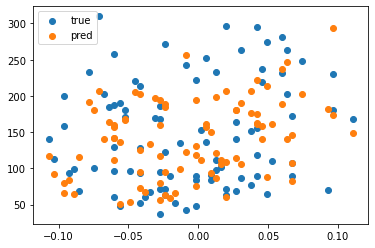

In [28]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()

plt.show()

## 결과 및 정리
- Learning Rate: 0.1 
- loss: MSE(Mean Squared Error) 
- Iteration: 10,000
- **Iteration 1350부터 Loss값 2999.2896 진입**
- **Test Data에 대한 성능: 2881.5383**